### Reconstruction of Image A with nnf obtained from Image A and Image B.

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from nnf import NNF

In [27]:
def reconstruct_img(img1, img2, patch_w=7, pm_iters=5):
    """
    Reconstruct the image using the nearest neighbor field
    """
    h, w = img1.shape[:2]
    output = img1.copy()
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()

    for ay in range(h - 7 + 1):
        for ax in range(w - 7 + 1):
            bx, by = nnf[ay, ax]
            output[ay:ay + 7, ax:ax + 7] = img2[by:by + 7, bx:bx + 7]

    return output

In [28]:
def reconstruct_img_average(img1, img2, patch_w=7, pm_iters=5):
    """
    Reconstruct the image by averaging pixels from all the patches it is a part of.
    """
    h, w = img1.shape[:2]
    output = np.zeros_like(img1, dtype=np.float32)
    count = np.zeros_like(img1, dtype=np.float32)
    
    patch_match = NNF(img1, img2, patch_w=patch_w, pm_iters=pm_iters)
    nnf, nnf_dist = patch_match.compute_nnf()
    
    for ay in range(h - patch_w + 1):
        for ax in range(w - patch_w + 1):
            bx, by = nnf[ay, ax]
            
            output[ay:ay + patch_w, ax:ax + patch_w] += img2[by:by + patch_w, bx:bx + patch_w]
            count[ay:ay + patch_w, ax:ax + patch_w] += 1
    
    output /= count
        
    return output.astype(np.uint8)


In [15]:
def plot_reconstructed_images(img1, img2, recon):    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Image A')
    ax[0].axis('off')

    ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Image B')
    ax[1].axis('off')

    ax[2].imshow(cv2.cvtColor(recon, cv2.COLOR_BGR2RGB))
    ax[2].set_title('Reconstructed Image A using Image B')
    ax[2].axis('off')

    plt.show()

In [16]:
a = cv2.imread('../images/a.png')
b = cv2.imread('../images/b.png')

In [17]:
recon_a = reconstruct_img(a, b)

Iteration 0 done in 7.112152 seconds
Iteration 1 done in 7.154261 seconds
Iteration 2 done in 7.021278 seconds
Iteration 3 done in 7.007777 seconds
Iteration 4 done in 6.930537 seconds


In [18]:
recon_a_using_avg = reconstruct_img_average(a, b)

Iteration 0 done in 7.063510 seconds
Iteration 1 done in 7.092163 seconds
Iteration 2 done in 6.930319 seconds
Iteration 3 done in 6.911388 seconds
Iteration 4 done in 6.889666 seconds


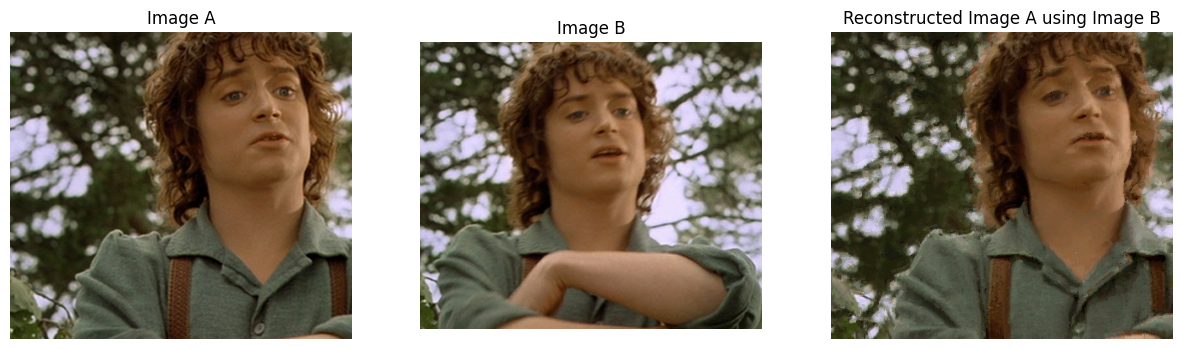

In [19]:
plot_reconstructed_images(a, b, recon_a)


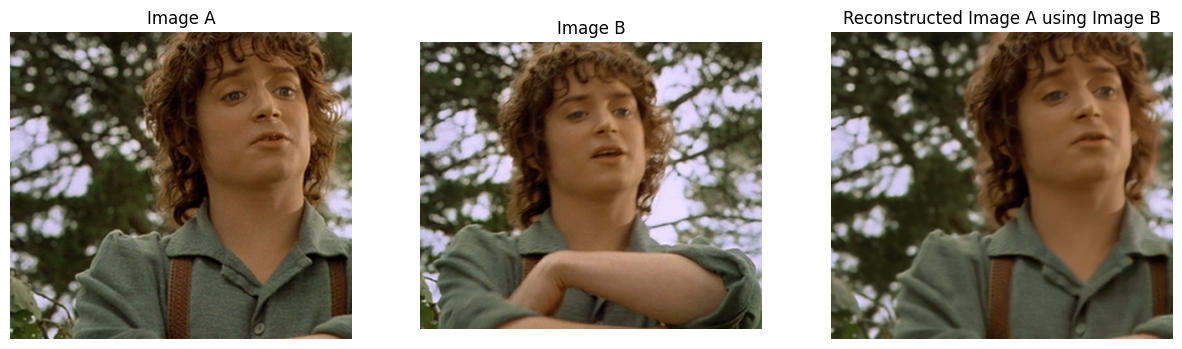

In [20]:
plot_reconstructed_images(a, b, recon_a_using_avg)

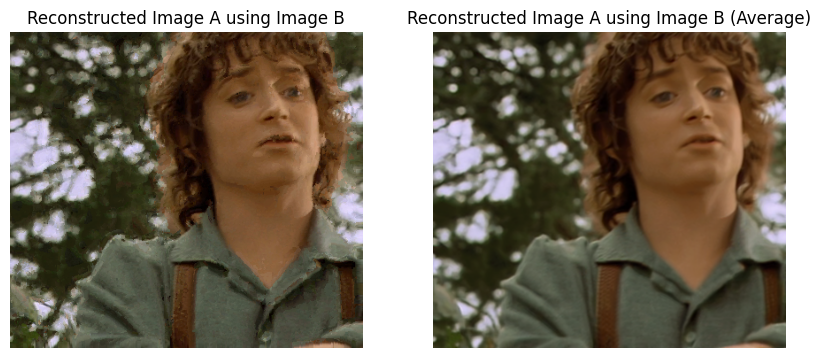

In [21]:
# compare the two methods
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(recon_a, cv2.COLOR_BGR2RGB))
ax[0].set_title('Reconstructed Image A using Image B')
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(recon_a_using_avg, cv2.COLOR_BGR2RGB))
ax[1].set_title('Reconstructed Image A using Image B (Average)')
ax[1].axis('off')

plt.show()

In [22]:
sky1 = cv2.imread('../images/football_sky.jpg')
sky2 = cv2.imread('../images/football_sky_masked.jpg')

In [23]:
recon_sky = reconstruct_img_average(sky1, sky2)

Iteration 0 done in 12.422804 seconds
Iteration 1 done in 12.232643 seconds
Iteration 2 done in 12.185450 seconds
Iteration 3 done in 12.325868 seconds
Iteration 4 done in 12.194924 seconds


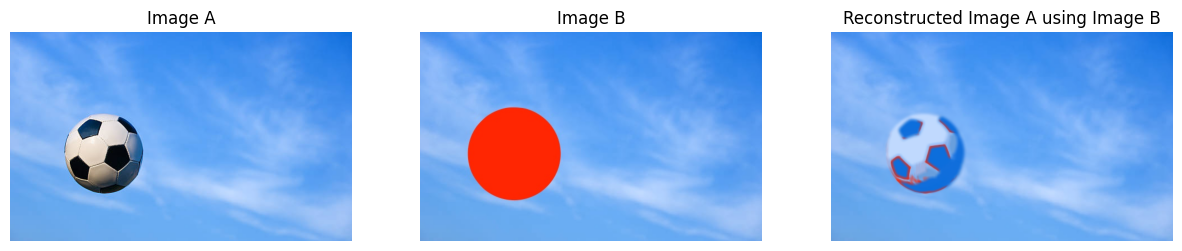

In [24]:
plot_reconstructed_images(sky1, sky2, recon_sky)

In [25]:
recon_sky_2 = reconstruct_img_average(sky2, sky1)

Iteration 0 done in 12.397776 seconds
Iteration 1 done in 12.197946 seconds
Iteration 2 done in 12.119871 seconds
Iteration 3 done in 12.155884 seconds
Iteration 4 done in 12.164134 seconds


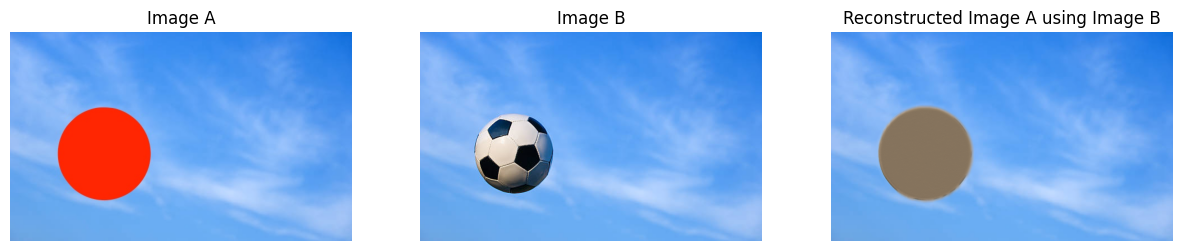

In [26]:
plot_reconstructed_images(sky2, sky1, recon_sky_2)